In [1]:
import pandas as pd
df = pd.read_csv('GoogleAdsCosts22-23.csv', index_col=)

In [101]:
l = []
for i in range(2, 13):
    l.append(f'Billing activity report({i}).csv')

In [102]:
df = pd.read_csv("Billing activity report(1).csv", parse_dates=['Date'], skiprows=2)
for i in l:
    t_df = pd.read_csv(i, parse_dates=['Date'], skiprows=2)
    df = pd.concat([df, t_df])

C:\Users\retai\AppData\Local\Temp\ipykernel_12324\694939404.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  t_df = pd.read_csv(i, parse_dates=['Date'], skiprows=2)
C:\Users\retai\AppData\Local\Temp\ipykernel_12324\694939404.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  t_df = pd.read_csv(i, parse_dates=['Date'], skiprows=2)
C:\Users\retai\AppData\Local\Temp\ipykernel_12324\694939404.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  t_df = pd.read_csv(i, parse_dates=['Date'], skiprows=2)


In [103]:
df = df[df['Type'] == 'Campaigns']

In [104]:
df

,Date,Type,Description,Interactions,Costs,Credits,Running balance,Clicks,Impressions,Conversions
9,2023-12-31,Campaigns,UK | PMax | Catchall,"1506 Clicks, impressions",£312.01,-£0.02,"£1,185.79",664,842,--
10,2023-12-31,Campaigns,UK | PMax | High ROAS 3.5>,"1269 Clicks, impressions",£216.79,-£0.03,£873.80,417,852,--
11,2023-12-31,Campaigns,UK | Leather > General,212 Clicks,£121.13,£0.00,£657.04,212,--,--
12,2023-12-31,Campaigns,UK | PMax | Mens Edinburgh Leather Jacket,"112 Clicks, impressions",£54.97,-£0.02,£535.91,98,14,--
13,2023-12-31,Campaigns,UK | Shopping | Mens Leather Jackets,208 Clicks,£54.46,£0.00,£480.96,208,--,--
...,...,...,...,...,...,...,...,...,...,...
893,2021-01-01,Campaigns,[VS] - Brand (Core) - [BM],26 Clicks,£16.69,£0.00,"£1,026.88",26,--,--
894,2021-01-01,Campaigns,[VS] - Leather (Gen) - [EM],36 Clicks,£10.59,£0.00,"£1,010.19",36,--,--
895,2021-01-01,Campaigns,UK | Search | Brand | Phrase,32 Clicks,£2.98,£0.00,£999.60,32,--,--
896,2021-01-01,Campaigns,UK | Ashwood (General),18 Clicks,£2.61,£0.00,£996.62,18,--,--


In [105]:
df['Costs'] = df['Costs'].astype(str)
df['Clicks'] = df['Clicks'].astype(str)
df['Impressions'] = df['Impressions'].astype(str)
df['Interactions'] = df['Interactions'].astype(str)
df['Costs'] = df['Costs'].str.replace('£', '')
df['Costs'] = df['Costs'].str.replace(',', '')
df['Costs'] = df['Costs'].str.replace(' --', '')
df['Costs'] = pd.to_numeric(df['Costs'].str.replace('', ''))
df['Costs'] = df['Costs'].astype(float)
df['Clicks'] = df['Clicks'].str.replace(' --', '')
df['Clicks'] = df['Clicks'].str.replace(',', '')
df['Clicks'] = pd.to_numeric(df['Clicks'].str.replace('', ''))
df['Clicks'] = df['Clicks'].astype(float)
df['Impressions'] = df['Impressions'].str.replace(' --', '')
df['Impressions'] = df['Impressions'].str.replace(',', '')
df['Impressions'] = pd.to_numeric(df['Impressions'].str.replace('', ''))
df['Impressions'] = df['Impressions'].astype(float)
df['Interactions'] = df['Interactions'].str.replace(' --', '')
df['Interactions'] = df['Interactions'].str.replace(',', '')
df['Interactions'] = df['Interactions'].str.replace(' Clicks', '')
df['Interactions'] = df['Interactions'].str.replace(' Clicks, impressions', '')
df['Interactions'] = df['Interactions'].str.replace(' impressions', '')
df['Interactions'] = df['Interactions'].str.replace(' acquisitions', '')
df['Interactions'] = pd.to_numeric(df['Interactions'].str.replace('', ''))
df['Interactions'] = df['Interactions'].astype(float)

In [106]:
df.rename(columns={'Date': 'date', 'Description': 'Campaign'}, inplace=True)
df[['date', 'Campaign', 'Interactions', 'Costs', 'Clicks']].to_csv('GoogleAdsCosts.csv', index=False)

In [107]:
df

,date,Type,Campaign,Interactions,Costs,Credits,Running balance,Clicks,Impressions,Conversions
9,2023-12-31,Campaigns,UK | PMax | Catchall,1506.0,312.01,-£0.02,"£1,185.79",664.0,842.0,--
10,2023-12-31,Campaigns,UK | PMax | High ROAS 3.5>,1269.0,216.79,-£0.03,£873.80,417.0,852.0,--
11,2023-12-31,Campaigns,UK | Leather > General,212.0,121.13,£0.00,£657.04,212.0,NaN,--
12,2023-12-31,Campaigns,UK | PMax | Mens Edinburgh Leather Jacket,112.0,54.97,-£0.02,£535.91,98.0,14.0,--
13,2023-12-31,Campaigns,UK | Shopping | Mens Leather Jackets,208.0,54.46,£0.00,£480.96,208.0,NaN,--
...,...,...,...,...,...,...,...,...,...,...
893,2021-01-01,Campaigns,[VS] - Brand (Core) - [BM],26.0,16.69,£0.00,"£1,026.88",26.0,NaN,--
894,2021-01-01,Campaigns,[VS] - Leather (Gen) - [EM],36.0,10.59,£0.00,"£1,010.19",36.0,NaN,--
895,2021-01-01,Campaigns,UK | Search | Brand | Phrase,32.0,2.98,£0.00,£999.60,32.0,NaN,--
896,2021-01-01,Campaigns,UK | Ashwood (General),18.0,2.61,£0.00,£996.62,18.0,NaN,--


In [109]:
df[(df['date'] <= pd.to_datetime('2023-12-31')) & (df['date'] >= pd.to_datetime('2023-01-01'))]

,date,Type,Campaign,Interactions,Costs,Credits,Running balance,Clicks,Impressions,Conversions
9,2023-12-31,Campaigns,UK | PMax | Catchall,1506.0,312.01,-£0.02,"£1,185.79",664.0,842.0,--
10,2023-12-31,Campaigns,UK | PMax | High ROAS 3.5>,1269.0,216.79,-£0.03,£873.80,417.0,852.0,--
11,2023-12-31,Campaigns,UK | Leather > General,212.0,121.13,£0.00,£657.04,212.0,NaN,--
12,2023-12-31,Campaigns,UK | PMax | Mens Edinburgh Leather Jacket,112.0,54.97,-£0.02,£535.91,98.0,14.0,--
13,2023-12-31,Campaigns,UK | Shopping | Mens Leather Jackets,208.0,54.46,£0.00,£480.96,208.0,NaN,--
...,...,...,...,...,...,...,...,...,...,...
2935,2023-01-01,Campaigns,UK | Search | Sheepskin Coat | 4,1.0,0.27,£0.00,"£2,336.83",1.0,NaN,--
2936,2023-01-01,Campaigns,EU | Search | Sheepskin Coat | 4,1.0,0.15,£0.00,"£2,336.56",1.0,NaN,--
2937,2023-01-01,Campaigns,AUZ | Dynamic | Full Site | 5,2.0,0.08,£0.00,"£2,336.41",2.0,NaN,--
2938,2023-01-01,Campaigns,Home & Living-Performance Max,52.0,0.06,-£0.01,"£2,336.33",NaN,52.0,--


In [110]:
temp_df = df[df['Campaign'] == 'UK | PMax | Luggage, Handbags, Purses'].set_index('date')

In [113]:
temp_df['Interactions'].sum()

256638.0

In [114]:
temp_df['Costs'].sum()

80269.1

<Axes: xlabel='date'>

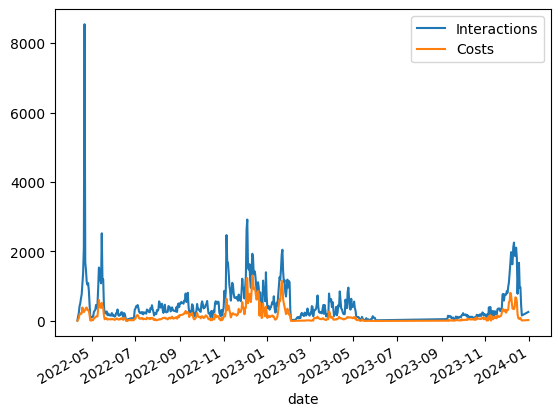

In [111]:
temp_df[['Interactions', 'Costs']].plot()